## NEW EXPERIMENTS ANALYSIS 

In [39]:
import os
import pandas as pd

# Folder containing the CSV files
folder_path = "Experiments_11_03_25"

# Define parameter ranges
window_sizes = range(1, 11)  # 1 to 5
ratios = [round(i * 0.1, 1) for i in range(6)]  # 0.0 to 0.5
iterations = range(0, 10)  # 0 to 9

# Dictionary to store final DataFrames
final_results = {}

# Loop over window sizes
for window_size in window_sizes:
    for ratio in ratios:
        all_f1_scores = []  # Store F1 scores for averaging
        all_days = []  # Store Day values

        # Loop over iterations
        for iteration in iterations:
            file_name = f"experiments_{window_size}_{ratio}_iter_{iteration}.csv"
            file_path = os.path.join(folder_path, file_name)

            # Check if file exists
            if not os.path.exists(file_path):
                print(f"Warning: {file_path} not found. Skipping...")
                continue
            
            # Read CSV
            df = pd.read_csv(file_path)

            # Filter rows where "Evaluation Type" is "Cumulative"
            df_cumulative = df[df["Evaluation Type"] == "Cumulative"].copy()

            # Compute F1-score for each row
            df_cumulative["F1-score"] = 2 * (df_cumulative["Precision"] * df_cumulative["Recall"]) / (
                df_cumulative["Precision"] + df_cumulative["Recall"]
            )

            # Append F1 scores and Days for averaging later
            all_f1_scores.append(df_cumulative[["Day", "F1-score"]])
        
        # If we gathered any F1-scores, compute the average while keeping "Day"
        if all_f1_scores:
            avg_f1_df = pd.concat(all_f1_scores).groupby("Day").mean().reset_index()
            final_results[(window_size, ratio)] = avg_f1_df

# Display results
for key, df in final_results.items():
    window_size, ratio = key
    print(f"\nWindow Size: {window_size}, Ratio: {ratio}")
    print(df)


Window Size: 1, Ratio: 0.0
   Day  F1-score
0    1  0.998039
1    2  0.978410
2    3  0.980446
3    4  0.984542
4    5  0.687251

Window Size: 1, Ratio: 0.1
   Day  F1-score
0    1  0.997860
1    2  0.978318
2    3  0.982611
3    4  0.984571
4    5  0.927490

Window Size: 1, Ratio: 0.2
   Day  F1-score
0    1  0.998217
1    2  0.978410
2    3  0.983017
3    4  0.984692
4    5  0.946330

Window Size: 1, Ratio: 0.3
   Day  F1-score
0    1  0.998039
1    2  0.978364
2    3  0.982980
3    4  0.984815
4    5  0.949545

Window Size: 1, Ratio: 0.4
   Day  F1-score
0    1  0.998217
1    2  0.978271
2    3  0.982906
3    4  0.984632
4    5  0.951951

Window Size: 1, Ratio: 0.5
   Day  F1-score
0    1  0.998039
1    2  0.978271
2    3  0.982943
3    4  0.984662
4    5  0.954073

Window Size: 2, Ratio: 0.0
   Day  F1-score
0    1  0.994633
1    2  0.975309
2    3  0.979292
3    4  0.959347
4    5  0.644839

Window Size: 2, Ratio: 0.1
   Day  F1-score
0    1  0.994633
1    2  0.975448
2    3  0.9

'Day5_Combined_Figure.pdf'

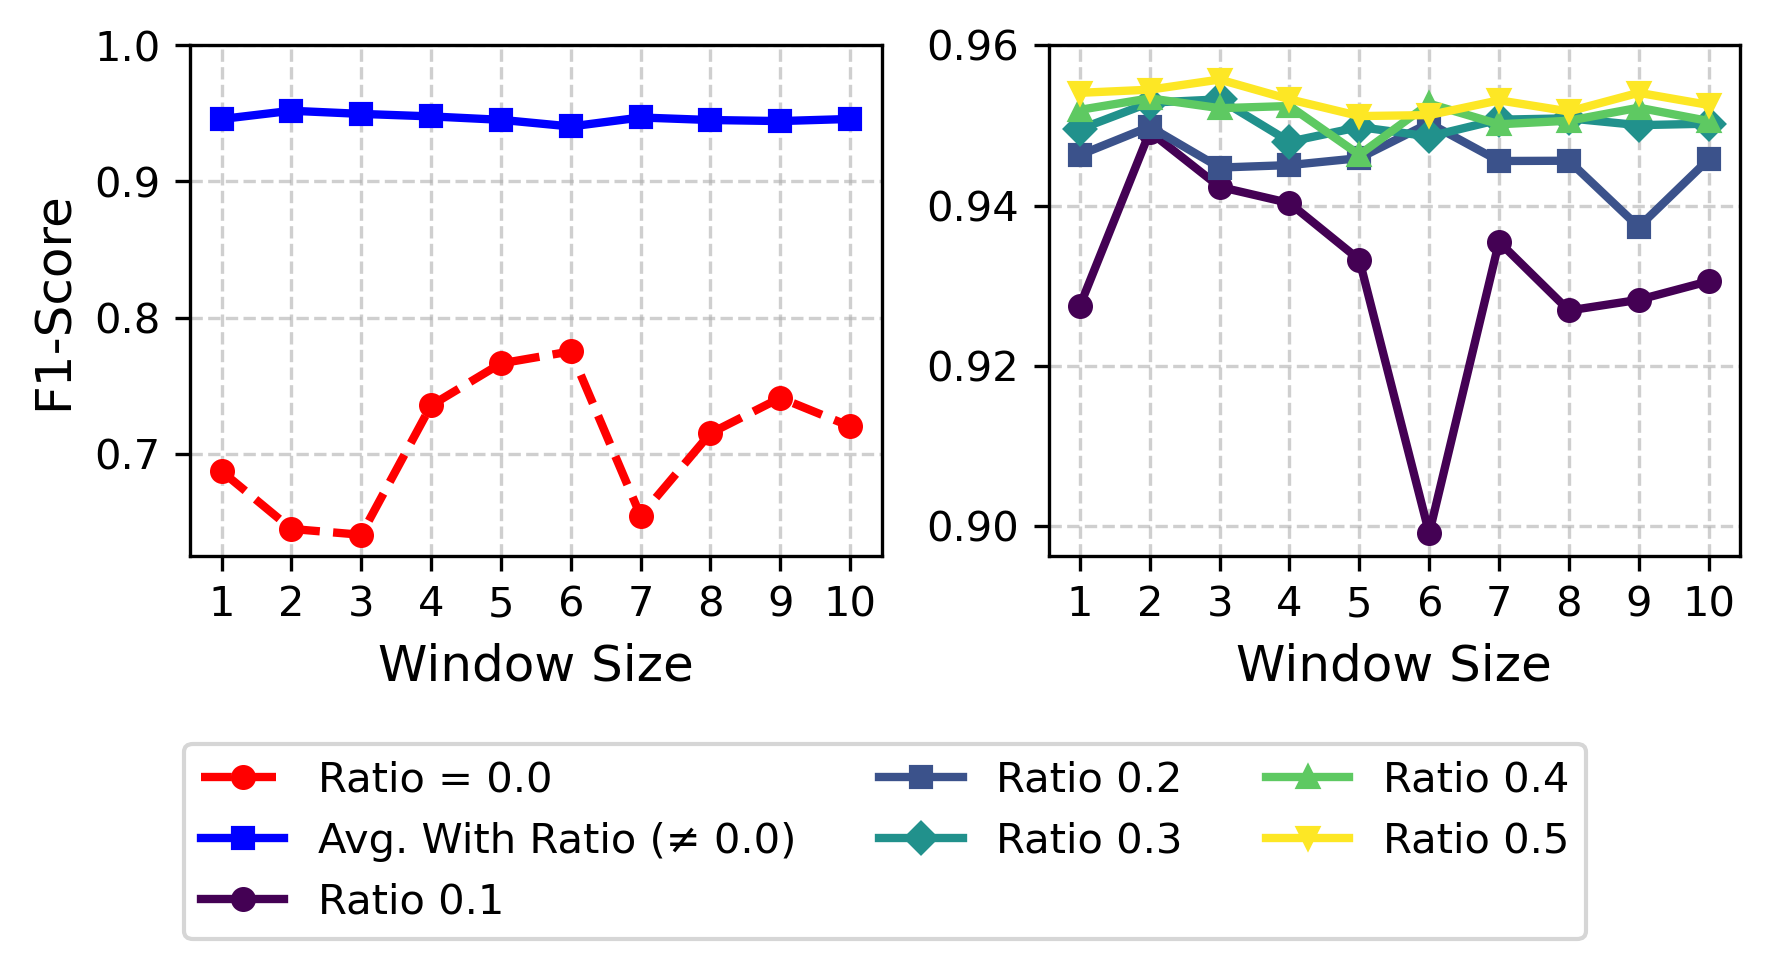

In [36]:
# Create a single figure with two subplots and different y-axis ticks
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5), dpi=300, sharey=False)

# First subplot: Ratio = 0.0 vs Ratio ≠ 0.0 with unique y-axis ticks
ax1 = axes[0]
line1, = ax1.plot(
    agg_no_ratio.index, agg_no_ratio.values, linestyle="--", marker="o", label="Ratio = 0.0",
    color="red", linewidth=2, markersize=5
)
line2, = ax1.plot(
    agg_with_ratio.index, agg_with_ratio.values, linestyle="-", marker="s", label="Avg. With Ratio (≠ 0.0)",
    color="blue", linewidth=2, markersize=5
)
ax1.set_xlabel("Window Size", fontsize=12)
ax1.set_ylabel("F1-Score", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_xticks(sorted(df_day5["Window Size"].unique()))
ax1.set_yticks([0.7, 0.8, 0.9, 1.00])  # Custom y-axis ticks for first plot
ax1.tick_params(axis='both', labelsize=10)

# Second subplot: Comparing Ratios from 0.1 to 0.5 with unique y-axis ticks
ax2 = axes[1]
lines = []
for (ratio, color, marker) in zip(unique_ratios, colors, marker_styles):
    df_ratio = df_day5[df_day5["Ratio"] == ratio]
    aggregated_f1 = df_ratio.groupby("Window Size")["F1-score"].mean()
    line, = ax2.plot(
        aggregated_f1.index, aggregated_f1.values, linestyle="-", marker=marker,
        label=f"Ratio {ratio:.1f}", color=color, linewidth=2, markersize=5
    )
    lines.append(line)

ax2.set_xlabel("Window Size", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.6)
ax2.set_xticks(sorted(df_day5["Window Size"].unique()))
ax2.set_yticks([0.90, 0.92, 0.94, 0.96])  # Custom y-axis ticks for second plot
ax2.tick_params(axis='both', labelsize=10)

# Common legend below both plots
fig.legend(handles=[line1, line2] + lines, loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the combined figure
pdf_path_combined = "Day5_Combined_Figure.pdf"
fig.savefig(pdf_path_combined, format="pdf", bbox_inches="tight")



('Day5_Ratio_vs_NoRatio.pdf', 'Day5_Comparing_Ratios.pdf')

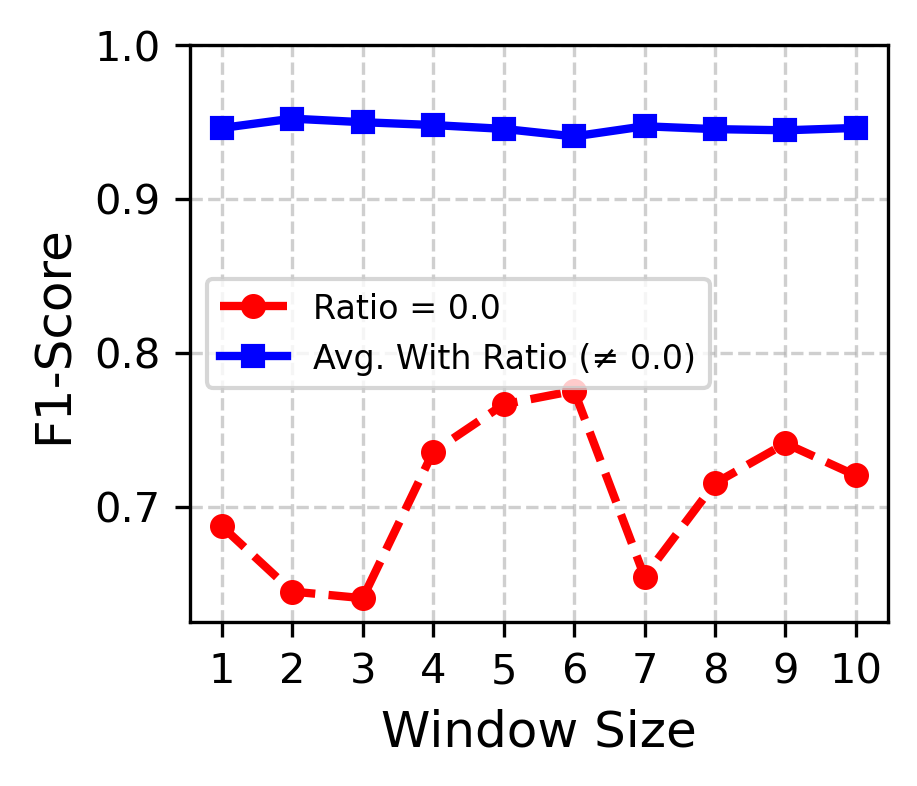

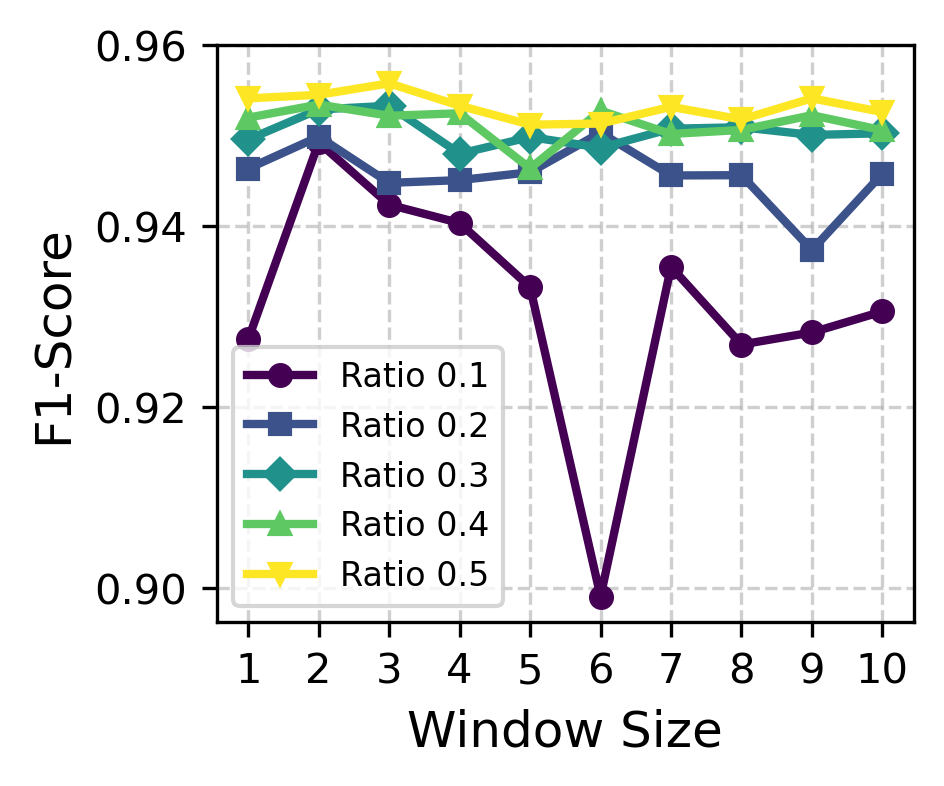

In [58]:
# Define marker styles for better distinction
marker_styles = ["o", "s", "D", "^", "v", "p", "*", "X", "<", ">"]

# First figure: Ratio = 0.0 vs Ratio ≠ 0.0
fig1, ax1 = plt.subplots(figsize=(3, 2.5), dpi=300)
ax1.plot(
    agg_no_ratio.index, agg_no_ratio.values, linestyle="--", marker="o", label="Ratio = 0.0",
    color="red", linewidth=2, markersize=5
)
ax1.plot(
    agg_with_ratio.index, agg_with_ratio.values, linestyle="-", marker="s", label="Avg. With Ratio (≠ 0.0)",
    color="blue", linewidth=2, markersize=5
)
ax1.set_xlabel("Window Size", fontsize=12)
ax1.set_ylabel("F1-Score", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.set_xticks(sorted(df_day5["Window Size"].unique()))
ax1.set_yticks([0.7, 0.8, 0.9, 1.00])  # Custom y-axis ticks
ax1.tick_params(axis='both', labelsize=10)
ax1.legend(fontsize=8, loc="center left")

# Save the first figure
pdf_path1 = "Day5_Ratio_vs_NoRatio.pdf"
fig1.savefig(pdf_path1, format="pdf", bbox_inches="tight")

# Second figure: Comparing Ratios from 0.1 to 0.5
fig2, ax2 = plt.subplots(figsize=(3, 2.5), dpi=300)
for (ratio, color, marker) in zip(unique_ratios, colors, marker_styles):
    df_ratio = df_day5[df_day5["Ratio"] == ratio]
    aggregated_f1 = df_ratio.groupby("Window Size")["F1-score"].mean()
    ax2.plot(
        aggregated_f1.index, aggregated_f1.values, linestyle="-", marker=marker,
        label=f"Ratio {ratio:.1f}", color=color, linewidth=2, markersize=5
    )

ax2.set_xlabel("Window Size", fontsize=12)
ax2.set_ylabel("F1-Score", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.6)
ax2.set_xticks(sorted(df_day5["Window Size"].unique()))
ax2.set_yticks([0.90, 0.92, 0.94, 0.96])  # Custom y-axis ticks
ax2.tick_params(axis='both', labelsize=10)
ax2.legend(fontsize=8, loc="lower left")

# Save the second figure
pdf_path2 = "Day5_Comparing_Ratios.pdf"
fig2.savefig(pdf_path2, format="pdf", bbox_inches="tight")

# Provide download links
pdf_path1, pdf_path2


In [41]:
# Define an empty dictionary to store FPR values
fpr_results = {}

# Loop over window sizes and ratios
for window_size in window_sizes:
    for ratio in ratios[1:]:  # Exclude 0.0, as per the request (0.1 to 0.5)
        all_fpr_values = []  # Store FPR values for averaging

        # Loop over iterations
        for iteration in iterations:
            file_name = f"experiments_{window_size}_{ratio}_iter_{iteration}.csv"
            file_path = os.path.join(folder_path, file_name)

            # Check if file exists
            if not os.path.exists(file_path):
                continue

            # Read CSV
            df = pd.read_csv(file_path)

            # Filter for Day 5 and "Cumulative" evaluation type
            df_filtered = df[(df["Day"] == 5) & (df["Evaluation Type"] == "Cumulative")].copy()

            if df_filtered.empty:
                continue

            # Extract False Positives (FP) and True Negatives (TN) from Confusion Matrix column
            try:
                df_filtered["Confusion Matrix"] = df_filtered["Confusion Matrix"].apply(eval)  # Convert string to list
                df_filtered["FP"] = df_filtered["Confusion Matrix"].apply(lambda x: x[0][1])  # False Positives
                df_filtered["TN"] = df_filtered["Confusion Matrix"].apply(lambda x: x[0][0])  # True Negatives

                # Compute False Positive Rate (FPR) = FP / (FP + TN)
                df_filtered["FPR"] = df_filtered["FP"] / (df_filtered["FP"] + df_filtered["TN"])

                # Append to list
                all_fpr_values.append(df_filtered["FPR"].values[0])  # Store single value for that iteration
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

        # Compute average FPR across iterations and store in dictionary
        if all_fpr_values:
            fpr_results[(window_size, ratio)] = sum(all_fpr_values) / len(all_fpr_values) * 100  # Convert to %

# Convert dictionary to a DataFrame (5x10 matrix format)
fpr_matrix = pd.DataFrame(
    index=ratios[1:],  # Ratios from 0.1 to 0.5
    columns=window_sizes  # Window sizes 1 to 10
)

# Fill the DataFrame with the computed FPR values
for (window_size, ratio), fpr_value in fpr_results.items():
    fpr_matrix.loc[ratio, window_size] = round(fpr_value, 2)  # Round to 2 decimal places

# Display the final FPR table
# tools.display_dataframe_to_user(name="Average False Positive Rate (FPR) Matrix", dataframe=fpr_matrix)
print(fpr_matrix)

       1     2     3     4     5     6     7     8     9     10
0.1  0.12  0.07  0.09  0.08   0.1  0.28  0.11  0.13  0.12  0.13
0.2  0.07  0.06  0.07  0.06  0.07  0.06  0.07  0.07  0.09  0.08
0.3  0.06  0.05  0.05  0.07  0.06  0.06  0.05  0.05  0.05  0.06
0.4  0.05  0.05  0.05  0.05  0.07  0.05  0.05  0.05  0.05  0.05
0.5  0.05  0.04  0.04  0.05  0.05  0.04  0.05  0.05  0.05  0.05


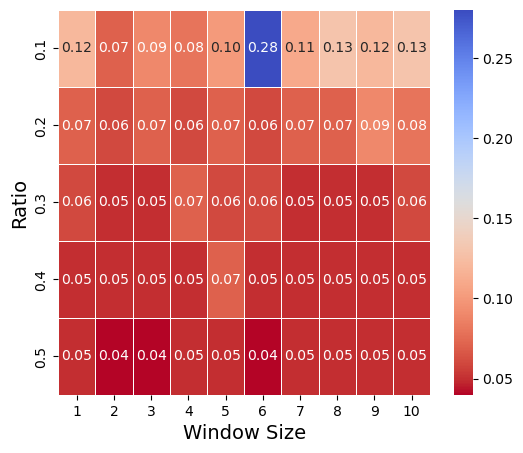

'FPR_Heatmap_Reversed_Corrected.pdf'

In [62]:
import seaborn as sns

# Ensure all values in the matrix are numeric, replacing NaN with 0 for visualization
fpr_matrix = fpr_matrix.apply(pd.to_numeric, errors='coerce').fillna(0)

# Create the heatmap with reversed colors (warm colors for low values, cool for high values)
plt.figure(figsize=(6, 5))
sns.heatmap(fpr_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm_r", linewidths=0.5)  # "_r" reverses the colormap

# Labels and title
plt.xlabel("Window Size", fontsize=14)
plt.ylabel("Ratio", fontsize=14)
#plt.title("Heatmap of Average False Positive Rate (FPR) (%)", fontsize=16)

# Save and display the heatmap
heatmap_reversed_path = "FPR_Heatmap_Reversed_Corrected.pdf"
plt.savefig(heatmap_reversed_path, format="pdf", bbox_inches="tight")
plt.show()

# Provide download link
heatmap_reversed_path


In [48]:
# Define an empty dictionary to store FNR values
fnr_results = {}

# Loop over window sizes and ratios
for window_size in window_sizes:
    for ratio in ratios[1:]:  # Exclude 0.0, focusing on 0.1 to 0.5
        all_fnr_values = []  # Store FNR values for averaging

        # Loop over iterations
        for iteration in iterations:
            file_name = f"experiments_{window_size}_{ratio}_iter_{iteration}.csv"
            file_path = os.path.join(folder_path, file_name)

            # Check if file exists
            if not os.path.exists(file_path):
                continue

            # Read CSV
            df = pd.read_csv(file_path)

            # Filter for Day 5 and "Cumulative" evaluation type
            df_filtered = df[(df["Day"] == 5) & (df["Evaluation Type"] == "Cumulative")].copy()

            if df_filtered.empty:
                continue

            # Extract False Negatives (FN) and True Positives (TP) from Confusion Matrix column
            try:
                df_filtered["Confusion Matrix"] = df_filtered["Confusion Matrix"].apply(eval)  # Convert string to list
                df_filtered["FN"] = df_filtered["Confusion Matrix"].apply(lambda x: x[1][0])  # False Negatives
                df_filtered["TP"] = df_filtered["Confusion Matrix"].apply(lambda x: x[1][1])  # True Positives

                # Compute False Negative Rate (FNR) = FN / (FN + TP)
                df_filtered["FNR"] = df_filtered["FN"] / (df_filtered["FN"] + df_filtered["TP"])

                # Append to list
                all_fnr_values.append(df_filtered["FNR"].values[0])  # Store single value for that iteration
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

        # Compute average FNR across iterations and store in dictionary
        if all_fnr_values:
            fnr_results[(window_size, ratio)] = sum(all_fnr_values) / len(all_fnr_values) * 100  # Convert to %

# Convert dictionary to a DataFrame (5x10 matrix format)
fnr_matrix = pd.DataFrame(
    index=ratios[1:],  # Ratios from 0.1 to 0.5
    columns=window_sizes  # Window sizes 1 to 10
)

# Fill the DataFrame with the computed FNR values
for (window_size, ratio), fnr_value in fnr_results.items():
    fnr_matrix.loc[ratio, window_size] = round(fnr_value, 2)  # Round to 2 decimal places

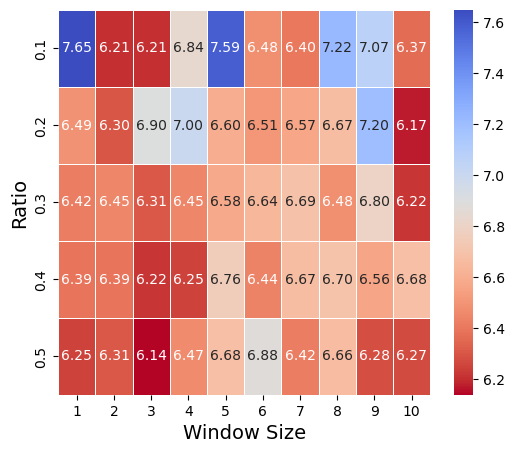

In [63]:
# Ensure all values are numeric for heatmap plotting
fnr_matrix = fnr_matrix.apply(pd.to_numeric, errors='coerce').fillna(0)

# Create the heatmap with reversed colors (warm colors for low values, cool for high values)
plt.figure(figsize=(6, 5))
sns.heatmap(fnr_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm_r", linewidths=0.5)  # "_r" reverses the colormap

# Labels and title
plt.xlabel("Window Size", fontsize=14)
plt.ylabel("Ratio", fontsize=14)
#plt.title("Heatmap of Average False Negative Rate (FNR) (%)", fontsize=16)

# Save and display the heatmap
heatmap_fnr_path = "FNR_Heatmap_Reversed_Corrected.pdf"
plt.savefig(heatmap_fnr_path, format="pdf", bbox_inches="tight")
plt.show()


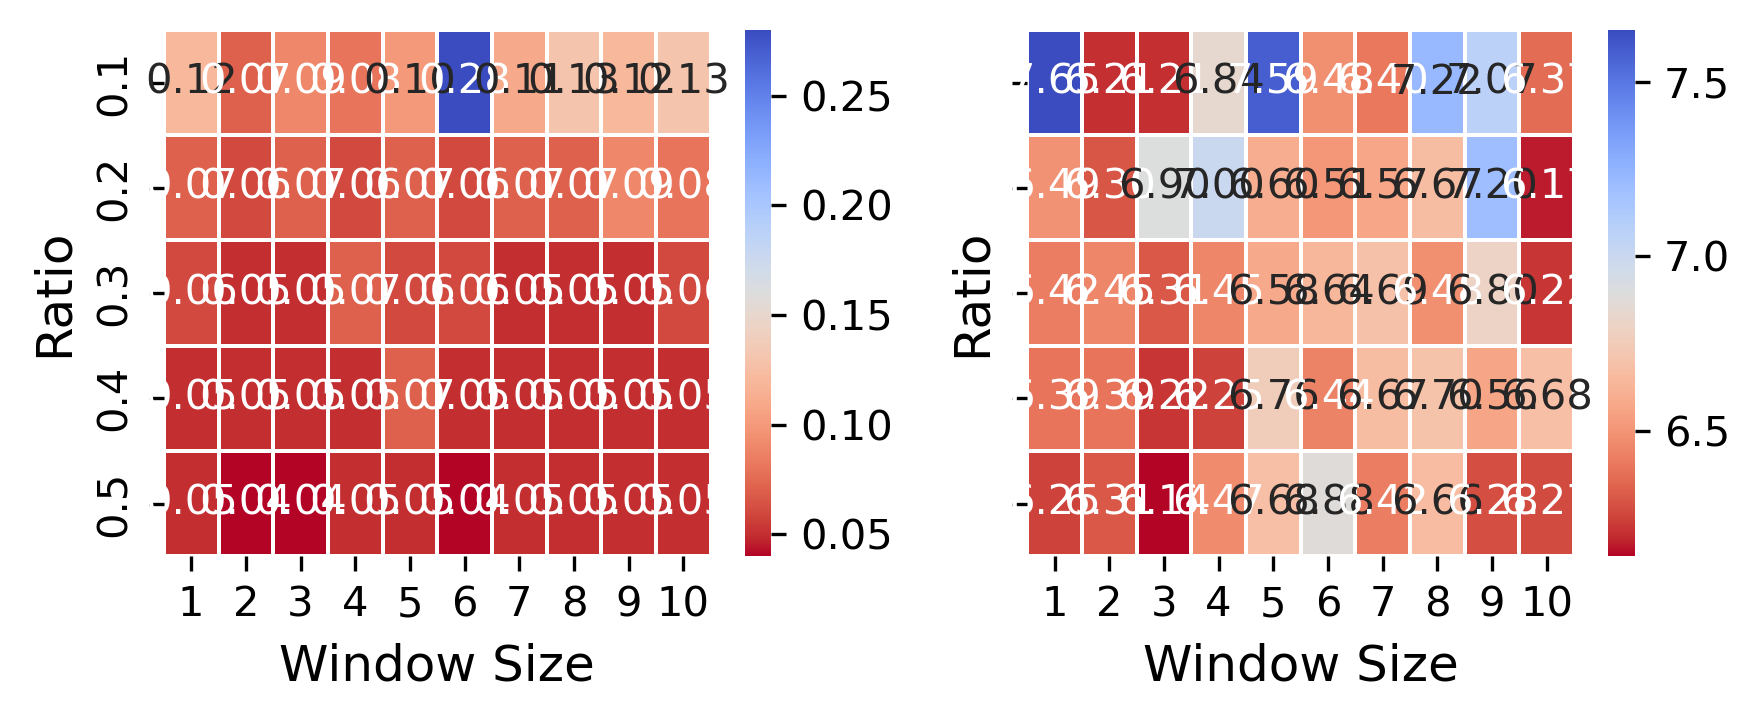

'FPR_FNR_Heatmaps_SideBySide.pdf'

In [52]:
# Create a figure with two subplots for FPR and FNR heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5), dpi=300, sharey=True)

# First subplot: FPR Heatmap
ax1 = axes[0]
sns.heatmap(fpr_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm_r", linewidths=0.5, ax=ax1)
ax1.set_xlabel("Window Size", fontsize=12)
ax1.set_ylabel("Ratio", fontsize=12)
# ax1.set_title("Average False Positive Rate (FPR) (%)", fontsize=14)

# Second subplot: FNR Heatmap
ax2 = axes[1]
sns.heatmap(fnr_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm_r", linewidths=0.5, ax=ax2)
ax2.set_xlabel("Window Size", fontsize=12)
ax2.set_ylabel("Ratio", fontsize=12)
# ax2.set_title("Average False Negative Rate (FNR) (%)", fontsize=14)

# Adjust layout for clarity
plt.tight_layout()

# Save the combined figure
heatmap_combined_path = "FPR_FNR_Heatmaps_SideBySide.pdf"
plt.savefig(heatmap_combined_path, format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

# Provide download link
heatmap_combined_path


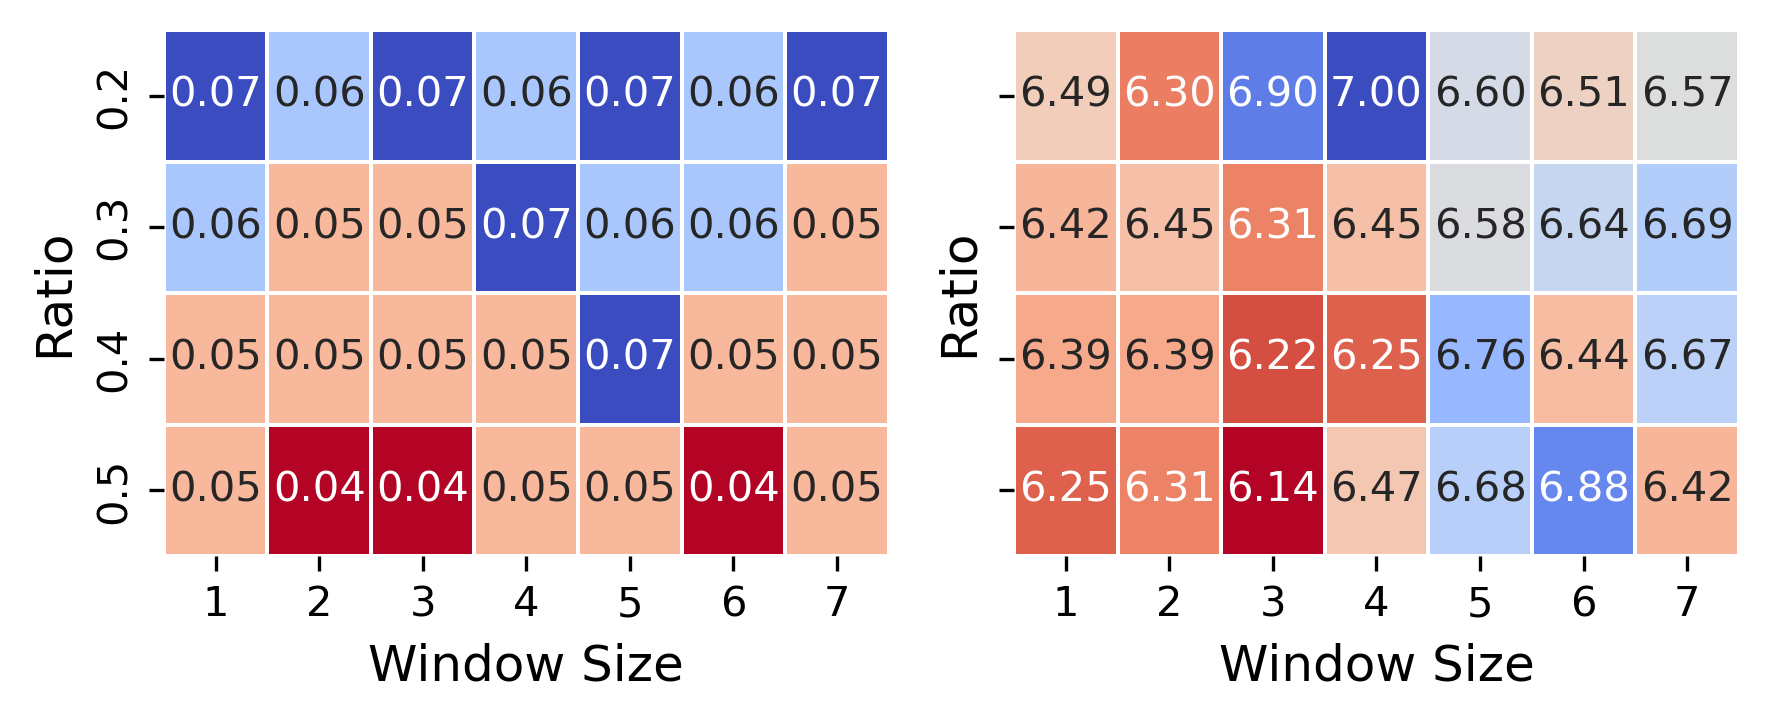

'FPR_FNR_Heatmaps_Filtered.pdf'

In [69]:
# Create a figure with two subplots for FPR and FNR heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5), dpi=300, sharey=True)

# First subplot: FPR Heatmap (without color bar)
ax1 = axes[0]
sns.heatmap(filtered_fpr_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm_r", linewidths=0.5, ax=ax1, cbar=False)
ax1.set_xlabel("Window Size", fontsize=12)
ax1.set_ylabel("Ratio", fontsize=12)

# Second subplot: FNR Heatmap (without color bar)
ax2 = axes[1]
sns.heatmap(filtered_fnr_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm_r", linewidths=0.5, ax=ax2, cbar=False)
ax2.set_xlabel("Window Size", fontsize=12)
ax2.set_ylabel("Ratio", fontsize=12)

# Adjust layout for clarity
plt.tight_layout()

# Save the combined figure
filtered_heatmap_path = "FPR_FNR_Heatmaps_Filtered.pdf"
plt.savefig(filtered_heatmap_path, format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

# Provide download link
filtered_heatmap_path



### Previous Days

In [72]:
# Folder containing the CSV files
folder_path = "Experiments_11_03_25"

# Define fixed parameters
window_size = 3
ratios = [0.0, 0.3]  # Two specific ratios
iterations = range(0, 10)  # 0 to 9
evaluation_types = [f"Previous Day {i}" for i in range(1, 5)]  # "Previous Day 1" to "Previous Day 4"

# Dictionary to store final results
final_results = {ratio: {eval_type: [] for eval_type in evaluation_types} for ratio in ratios}

# Loop over ratios
for ratio in ratios:
    for iteration in iterations:
        file_name = f"experiments_{window_size}_{ratio}_iter_{iteration}.csv"
        file_path = os.path.join(folder_path, file_name)

        # Check if file exists
        if not os.path.exists(file_path):
            print(f"Warning: {file_path} not found. Skipping...")
            continue

        # Read CSV file
        df = pd.read_csv(file_path)

        # Loop over each evaluation type
        for eval_type in evaluation_types:
            # Filter for specific Evaluation Type and Day 5
            df_filtered = df[(df["Evaluation Type"] == eval_type) & (df["Day"] == 5)].copy()

            # Compute F1-score for each row
            df_filtered["F1-score"] = 2 * (df_filtered["Precision"] * df_filtered["Recall"]) / (
                df_filtered["Precision"] + df_filtered["Recall"]
            )

            # Store F1 scores for averaging later
            final_results[ratio][eval_type].append(df_filtered["F1-score"])

# Compute the averages and create a table
avg_f1_scores = pd.DataFrame(columns=evaluation_types, index=ratios)

for ratio in ratios:
    for eval_type in evaluation_types:
        # If there are F1-score values, compute the mean
        if final_results[ratio][eval_type]:
            avg_f1_scores.loc[ratio, eval_type] = pd.concat(final_results[ratio][eval_type]).mean()

# Convert values to percentage format
avg_f1_scores = avg_f1_scores.astype(float).round(4) * 100
print(avg_f1_scores)
# Display the final table
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Average F1-score for Window Size 3", dataframe=avg_f1_scores)


     Previous Day 1  Previous Day 2  Previous Day 3  Previous Day 4
0.0           68.67           64.70           70.37           36.51
0.3           99.57           96.38           99.72           98.92
